In [199]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git


  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to c:\users\lucia\appdata\local\temp\pip-req-build-dh807wlq
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit c7c803be504f526c1a17677839280f456cdc3a81
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 'C:\Users\lucia\AppData\Local\Temp\pip-req-build-dh807wlq'


In [200]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
# from testing import test_3

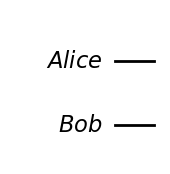

In [201]:
qa = QuantumRegister(1, name='Alice')
qb = QuantumRegister(1, name='Bob')

qc = QuantumCircuit( qa, qb ) 

qc.draw('mpl') 

In [202]:
num_bits = 10
alice_random_bits = np.random.randint(0,3,size=num_bits)
bob_random_bits = np.random.randint(0,3,size=num_bits)
alice_random_bits

array([2, 2, 2, 1, 2, 0, 2, 1, 1, 1], dtype=int32)

In [203]:
qc_a1 = QuantumCircuit(1)

qc_a2 = QuantumCircuit(1)
qc_a2.ry( np.pi/4, 0 )

qc_a3 = QuantumCircuit(1)
qc_a3.ry( np.pi/2, 0 )

qc_a = [qc_a1,qc_a2,qc_a3]

In [204]:
qc_b1 = QuantumCircuit(1)
qc_b1.ry( np.pi/4, 0 )

qc_b2 = QuantumCircuit(1)
qc_b2.ry( np.pi/2, 0 )

qc_b3 = QuantumCircuit(1)
qc_b3.ry( 3*np.pi/4, 0 )

qc_b = [qc_b1,qc_b2,qc_b3]

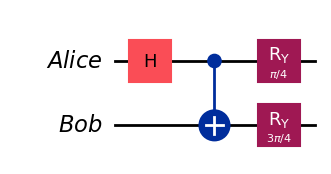

In [205]:
qcs = []
for j in range(num_bits):
    
    qc = QuantumCircuit( qa, qb ) 
    qc.h(0)
    qc.cx(0,1)
    qc.compose( qc_a[alice_random_bits[j]], qubits=qa, inplace=True )
    qc.compose( qc_b[bob_random_bits[j]], qubits=qb, inplace=True )
    qcs.append(qc) 
qcs[9].draw('mpl') 

In [206]:
from qiskit.quantum_info import Pauli, SparsePauliOp

In [207]:
X = Pauli('X')
Z = Pauli('Z')

In [208]:
SparsePauliOp( 'Z', 1 )

SparsePauliOp(['Z'],
              coeffs=[1.+0.j])

In [209]:
A = [ SparsePauliOp( 'Z', 1 ),
    SparsePauliOp( ['Z', 'X'], [np.cos(np.pi/4), np.sin(np.pi/4)]),
    SparsePauliOp( ['Z', 'X'], [np.cos(np.pi/2), np.sin(np.pi/2)]),
    ]

In [210]:
B = [ SparsePauliOp( ['Z', 'X'], [np.cos(np.pi/4), np.sin(np.pi/4)]),
    SparsePauliOp( ['Z', 'X'], [np.cos(np.pi/2), np.sin(np.pi/2)]),
    SparsePauliOp( ['Z', 'X'], [np.cos(3*np.pi/4), np.sin(3*np.pi/4)]),
    ]

In [211]:
A[0] ^ B[0] 

SparsePauliOp(['ZZ', 'ZX'],
              coeffs=[0.70710678+0.j, 0.70710678+0.j])

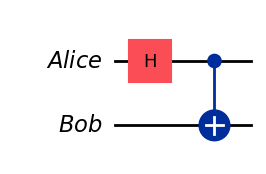

In [212]:
qa = QuantumRegister(1, name='Alice')
qb = QuantumRegister(1, name='Bob')

qc = QuantumCircuit( qa, qb ) 
qc.h(0)
qc.cx(0,1)

qc.draw('mpl') 

In [213]:
from qiskit_aer.primitives import Estimator 

backend = Estimator()

In [214]:
for j in range(num_bits):
    a = alice_random_bits[j]
    b = bob_random_bits[j]

    job = backend.run( qc, A[a] ^ B[b], shots=1 )
    value = job.result().values
    print(value) 

[1.]
[0.]
[1.41421356]
[-1.]
[1.]
[0.]
[1.41421356]
[1.11022302e-16]
[-1.]
[1.]
